## Predicting Boston Housing 

The dataset for this project originates from [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 feature for homes from various suburbs in Boston, Massachusettes. For the purpose of this project, the following preprocessing steps have been made to the dataset. 

* 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
* 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
* The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
* The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

In [2]:
 # Importing required Libraries for the project 

import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Importing supplementary visualisations code 

import visuals as vs

# Pretty display for notebook

%matplotlib inline

In [3]:
# Loadin Boston Housing Data

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

Making a cursory investigation about the Boston housing data and providing observations. I will first start with the statistics of the data set in order the get more comfortable and learn from the data. 

In [4]:
# Minimum price of the data 
minimum_price = data['MEDV'].min(0)

# Maximum prive of the data
maximum_price = data['MEDV'].max()

# Mean Price of the data 
mean_price = data['MEDV'].mean()

# Median price of the data
median_price = data['MEDV'].median()

# Standard deviation of prices of the data 
std_price = data['MEDV'].std()

print 'Statistics for the Boston Housing Dataset'
print 'Minimum price: ${:,.2f}'.format(minimum_price)
print 'Maximum price: ${:,.2f}'.format(maximum_price)
print 'Mean price: ${:,.2f}'.format(mean_price)
print 'Median price: ${:,.2f}'.format(median_price)
print 'Standard Deviation of prices: ${:,.2f}'.format(std_price)

# We could have get the same statistics outcome by using pythons .decscribe() argumennt. 



Statistics for the Boston Housing Dataset
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard Deviation of prices: $165,340.28


## Some Observatoins 

I will use some basic scatterplot to see any relationship in variables. 



In [27]:
# Importing plotly for creating scatterplots 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='borgausifo', api_key='nMiM4QfnSUGXd9VegD6L')

# Create Trace

trace = go.Scatter(x = data['RM'], y = data['MEDV'], mode = 'markers')
data_2 = [trace]

# Plot and embed in ipython notebook!

py.iplot(data_2, filename='basic-scatter_RM')



Above graph shows us there is some positive relationship between home prices and average number of homes!!! 

In [9]:
trace_2 = go.Scatter(x = data['LSTAT'], y = data['MEDV'], mode = 'markers')
data_3 = [trace_2]
py.iplot(data_3, filename='basic-scatter_LSTAT')

Above Graph shows us there is negative relationship between home prices and neioghborhood !!! 

In [6]:
trace_3 = go.Scatter(x = data['PTRATIO'], y = data['MEDV'], mode = 'markers')
data_4 = [trace_3]
py.iplot(data_4, filename='basic-scatter_PTRATIO')

It is hard to tell any relationship between home prices and ratio of students to teacher in primary and secondary schools inn the neighborhood. 

## Developing a Model 

In this section I will develop tool and techniques necessary for a model to make predictions. 

#### Implementation : Defining a Performance Metric

I will be calculating the [coefficient of determination](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R2, to quantify model's performance. It's a useful statistic in regression analysis, as it often describe how 'good' that model is at making predictions. 

* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.




In [11]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score



In [13]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


### Implementation: Shuffle and Split Data 

I will be splitting the data into training and testing subsets. Also i will shuffle the dataset to remove any biasing in the ordering of the dataset. 


In [29]:
# Importing sklearn train_test_split for shuffle and split 

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prices, features, test_size = 0.20, random_state = 6)

print "Training and testing split was successful" 


Training and testing split was successful


## Analyzing Model Performance 

### Learning Curves 

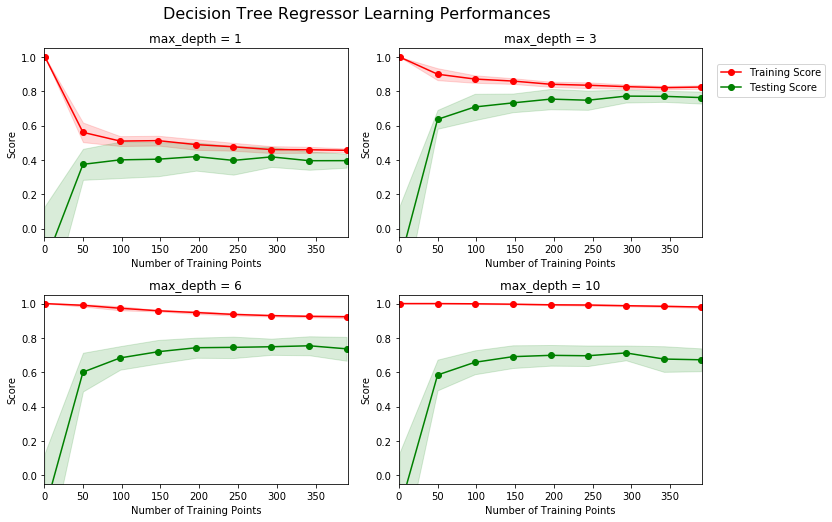

In [30]:
# Producing Learning Curve 

vs.ModelLearning(features, prices)

In [31]:
# Creating Complexity Curves 
vs.ModelComplexity(X_train, y_train)

/Users/borgausifo/anaconda/envs/Python27/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



ValueError: Number of labels=312 does not match number of samples=1